In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [4]:
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

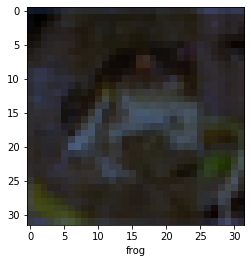

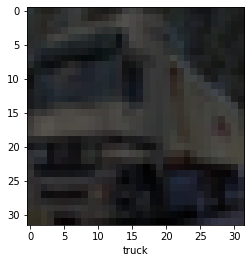

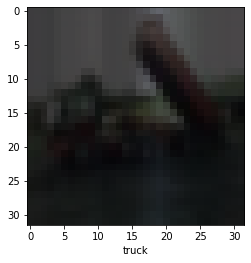

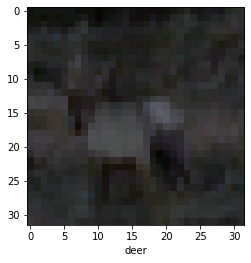

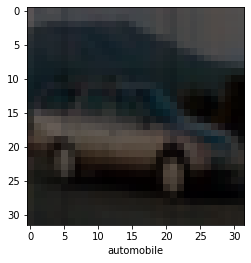

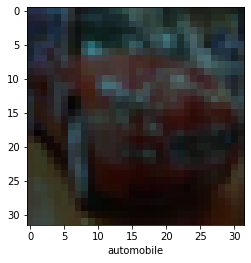

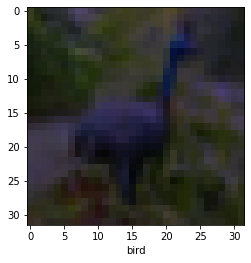

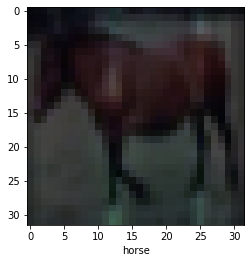

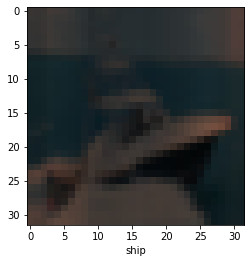

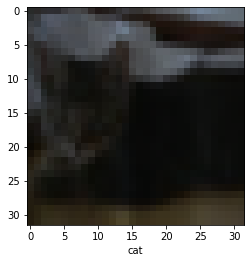

In [7]:
for i in range(10):
    plt.imshow(x_train[i])
    image_label = class_names[np.argmax(y_train[i])]
    plt.xlabel(image_label)
    plt.show()

In [8]:
opt_rms = tf.keras.optimizers.RMSprop(lr=0.0003,decay=1e-6)

model = Sequential()
model.add(Conv2D(48, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(192, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir\model', histogram_freq=1)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 96)        83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 96)          0

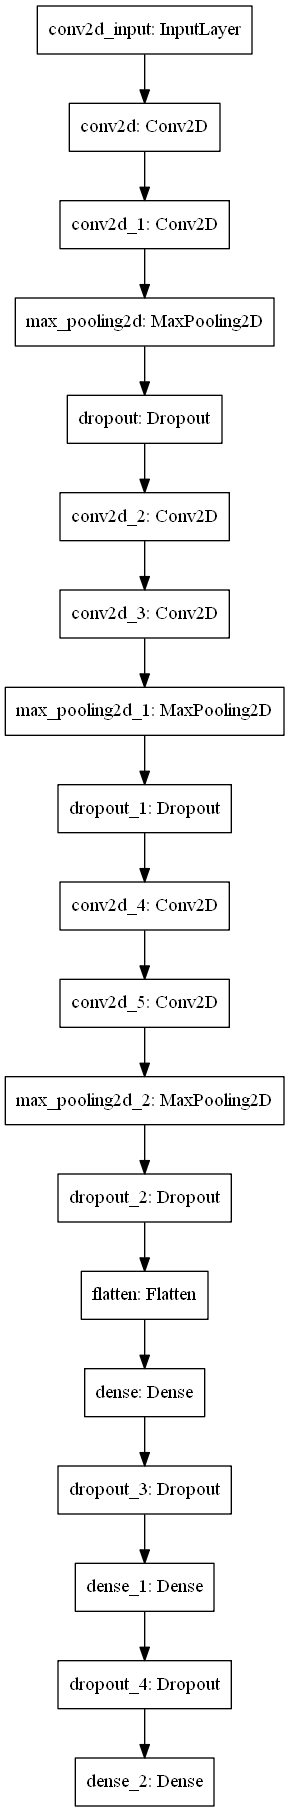

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [11]:
model_info = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 24s 476us/sample - loss: 2.1249 - accuracy: 0.2016 - val_loss: 1.8477 - val_accuracy: 0.3105
Epoch 2/30
50000/50000 [==============================] - 18s 356us/sample - loss: 1.8183 - accuracy: 0.3317 - val_loss: 1.7062 - val_accuracy: 0.3591
Epoch 3/30
50000/50000 [==============================] - 18s 360us/sample - loss: 1.6427 - accuracy: 0.4038 - val_loss: 1.6103 - val_accuracy: 0.4301
Epoch 4/30
50000/50000 [==============================] - 18s 360us/sample - loss: 1.4828 - accuracy: 0.4678 - val_loss: 1.4147 - val_accuracy: 0.4988
Epoch 5/30
50000/50000 [==============================] - 18s 356us/sample - loss: 1.3520 - accuracy: 0.5203 - val_loss: 1.2171 - val_accuracy: 0.5751
Epoch 6/30
50000/50000 [==============================] - 18s 355us/sample - loss: 1.2332 - accuracy: 0.5672 - val_loss: 1.1772 - val_accuracy: 0.5692
Epoch 7/30
50000/50000 [====================

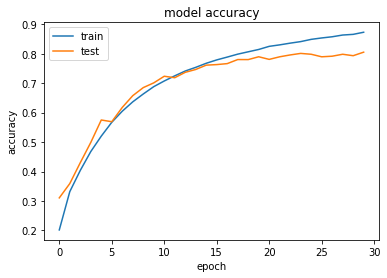

In [12]:
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

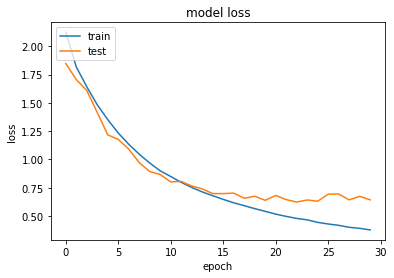

In [13]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

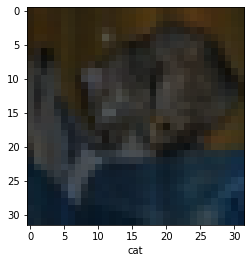

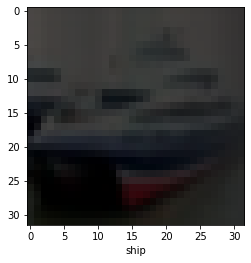

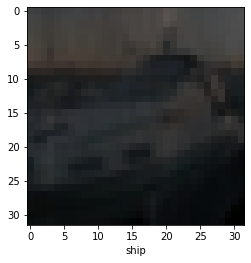

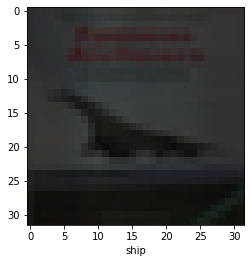

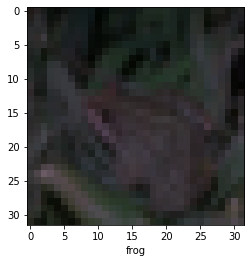

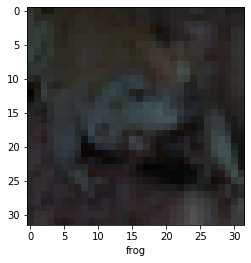

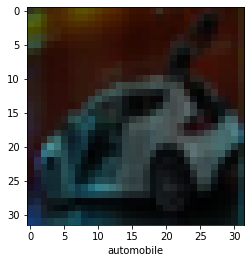

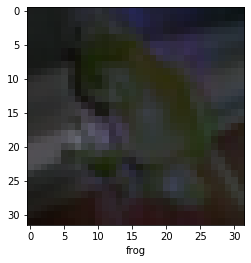

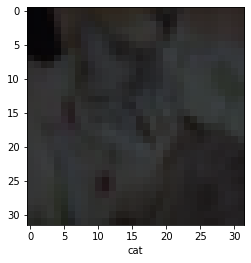

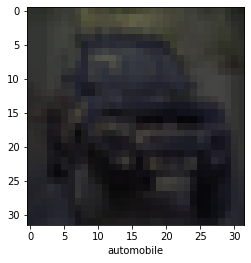

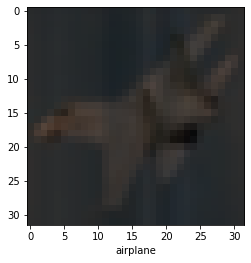

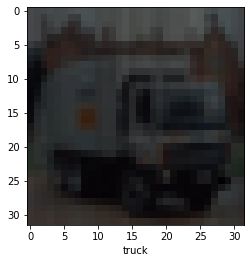

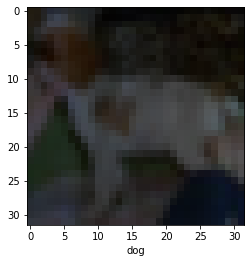

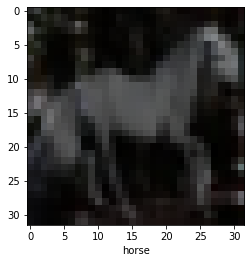

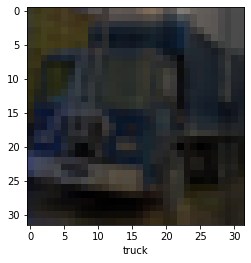

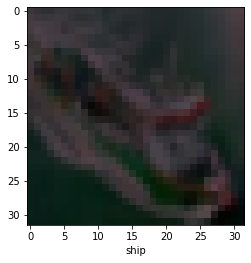

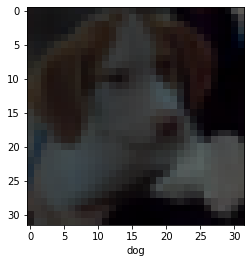

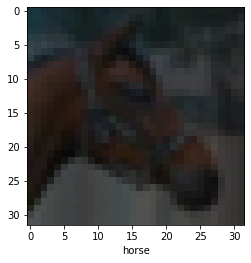

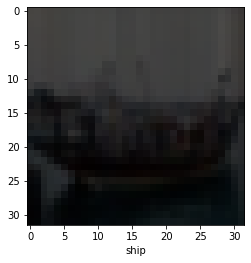

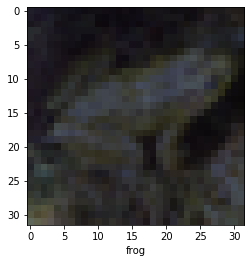

In [14]:
predictions = model.predict([x_test])

for x in range(20):
    plt.imshow(x_test[x])
    predicted_label = np.argmax(predictions[x])
    label = class_names[predicted_label]
    plt.xlabel(label)
    plt.show()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True)

In [16]:
model_info2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128), validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//128, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
390/390 [==============================] - 40s 103ms/step - loss: 0.6761 - accuracy: 0.7794 - val_loss: 0.6427 - val_accuracy: 0.7910
Epoch 2/20
390/390 [==============================] - 40s 104ms/step - loss: 0.6467 - accuracy: 0.7846 - val_loss: 0.6141 - val_accuracy: 0.7942
Epoch 3/20
390/390 [==============================] - 40s 102ms/step - loss: 0.6262 - accuracy: 0.7892 - val_loss: 0.7096 - val_accuracy: 0.7786
Epoch 4/20
390/390 [==============================] - 40s 103ms/step - loss: 0.6233 - accuracy: 0.7928 - val_loss: 0.6036 - val_accuracy: 0.8014
Epoch 5/20
390/390 [==============================] - 41s 106ms/step - loss: 0.6115 - accuracy: 0.7983 - val_loss: 0.6373 - val_accuracy: 0.7905
Epoch 6/20
390/390 [==============================] - 41s 104ms/step - loss: 0.6034 - accuracy: 0.7977 - val_loss: 0.6775 - val_accuracy: 0.7831
Epoch 7/20
390/390 [==============================] - 42s 108ms/step - loss: 0.5976 - accuracy: 0.8032 - val_loss: 0.6098 - val_ac

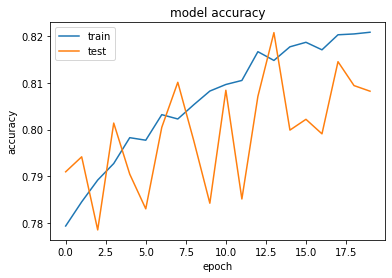

In [17]:
plt.plot(model_info2.history['accuracy'])
plt.plot(model_info2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

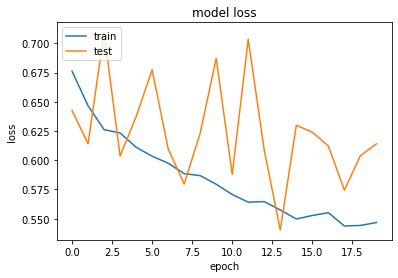

In [18]:
plt.plot(model_info2.history['loss'])
plt.plot(model_info2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

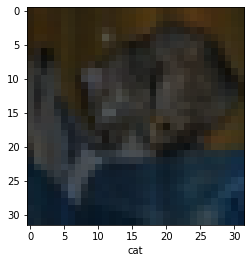

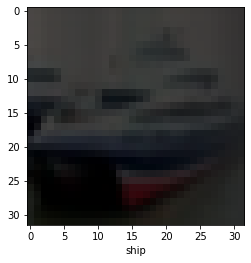

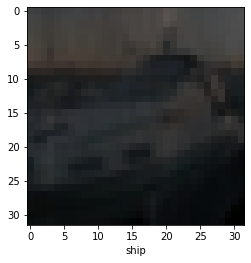

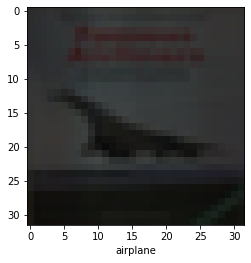

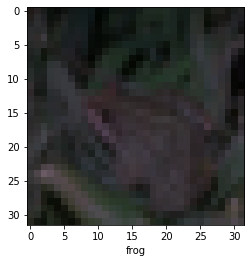

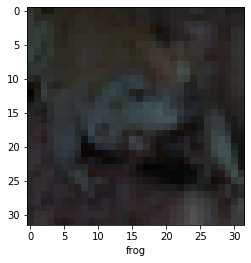

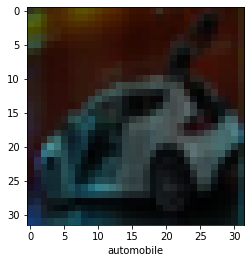

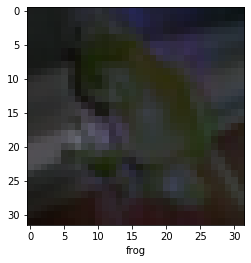

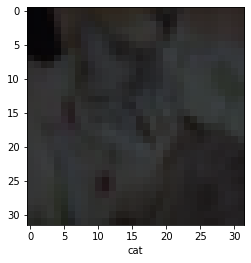

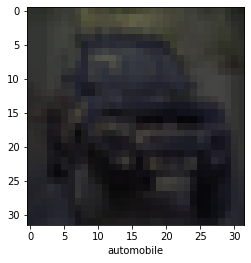

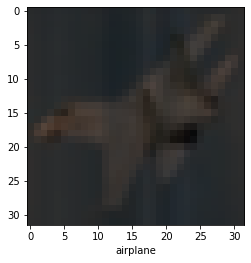

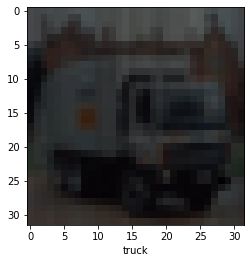

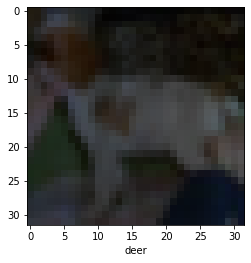

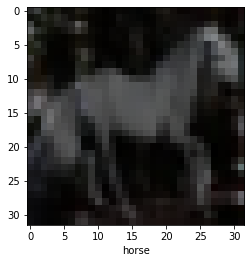

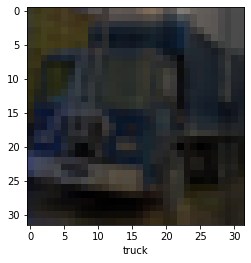

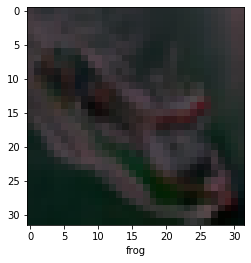

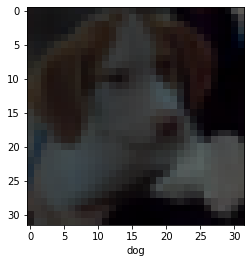

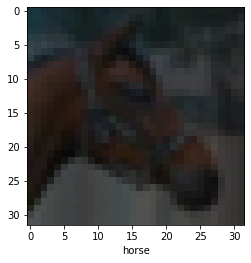

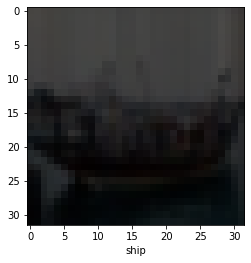

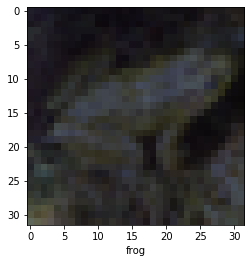

In [19]:
predictions = model.predict([x_test])

for x in range(20):
    plt.imshow(x_test[x])
    predicted_label = np.argmax(predictions[x])
    label = class_names[predicted_label]
    plt.xlabel(label)
    plt.show()